In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import os
import re
import pickle
from IPython.display import clear_output

In [3]:
funded_R01_projects_category = pd.DataFrame()
for root, dirs, files in os.walk("data/funded_R01_projects_category_dfs/", topdown=True):
    for file in files:
        df = pd.read_csv(os.path.join(root, file))
        funded_R01_projects_category = funded_R01_projects_category.append(df)

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,11,12,15,19,24,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,11,12,15,17,19,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
funded_R01_projects_category.head()

,APPLICATION_ID,ARRA_FUNDED,AWARD_NOTICE_DATE,BUDGET_END,BUDGET_START,CFDA_CODE,CORE_PROJECT_NUM,DIRECT_COST_AMT,ED_INST_TYPE,FOA_NUMBER,...,PROJECT_TITLE,STUDY_SECTION,SUBPROJECT_ID,SUFFIX,TOTAL_COST,TOTAL_COST_SUB_PROJECT,ABSTRACT_TEXT,grant_num,category,probability
0,7499670,NaN,2008-09-12T00:00:00,08/31/2009,09/01/2008,389.0,U24RR018107,NaN,SCHOOLS OF MEDICINE,NaN,...,ESTABLISHMENT OF SPECIFIC PATHOGEN FREE RHESUS...,RIRG,NaN,NaN,741430.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018107,Tuberculosis,1.000000
1,7495989,NaN,2008-09-16T00:00:00,06/30/2009,09/01/2008,389.0,U24RR018108,NaN,UNIVERSITY-WIDE,NaN,...,ENHANCEMENT OF THE CPRC-SPF RHESUS MONKEY PROGRAM,RIRG,NaN,NaN,1811959.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018108,Tuberculosis,0.999931
2,7502303,NaN,2008-09-01T00:00:00,06/30/2009,09/01/2008,389.0,U24RR018109,NaN,PRIMATE CENTERS,NaN,...,SPF Breeding Colonies at the Yerkes NPRC,RIRG,NaN,A1,1431792.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018109,Tuberculosis,0.999549
3,7501548,NaN,2008-06-30T00:00:00,06/30/2009,07/01/2008,389.0,U24RR018111,NaN,PRIMATE CENTERS,NaN,...,Establishment and Expansion of SPF Rhesus Colony,RIRG,NaN,A1,1908805.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018111,Tuberculosis,1.000000
4,7439671,NaN,2008-08-16T00:00:00,05/31/2009,08/18/2008,389.0,U24RR018144,NaN,PRIMATE CENTERS,NaN,...,Genetically Defined Herpes/Retrovirus SPF Maca...,RIRG,NaN,NaN,2067808.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018144,Tuberculosis,0.999975


In [7]:
nih_budget = pd.read_csv("data/nih_budget.csv")
brdpi = pd.read_excel("data/BRDPI Table FY 1950 to 2023_Jan 2018_Rev.xlsx", skiprows = [0, 1, 2], skip_footer = 10)

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/pandas/util/_decorators.py:178: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


In [8]:
nih_budget_actual_percentages = [100]
counter = 1
annual_budgets = nih_budget.loc[nih_budget.FY >= 1950].Total.tolist()
l = len(annual_budgets)-1
while counter <= l:
    pct_inc = annual_budgets[counter]/annual_budgets[counter-1]
    overall_pct_inc = pct_inc + nih_budget_actual_percentages[-1]
    nih_budget_actual_percentages.append(overall_pct_inc)
    counter += 1

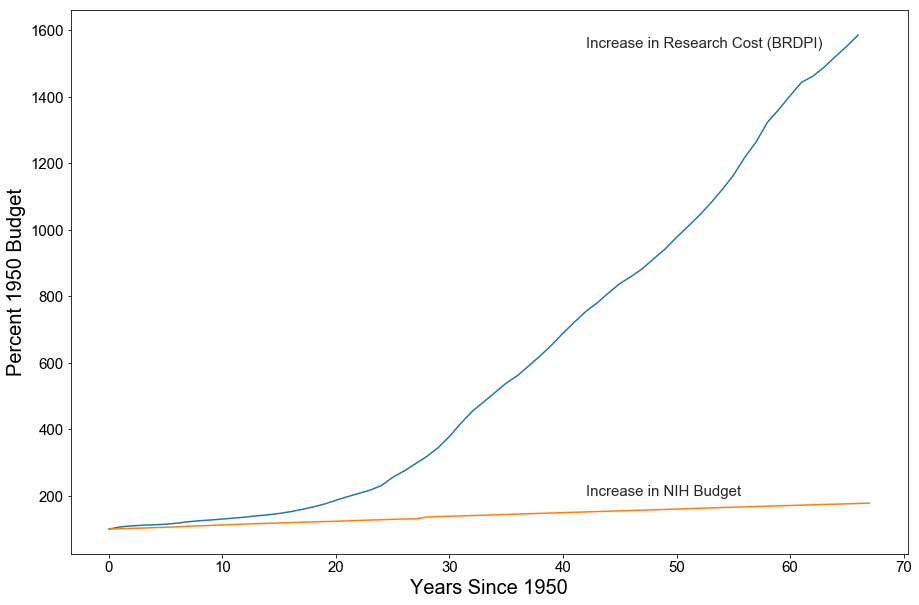

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(brdpi[1950][:-7])
plt.plot(nih_budget_actual_percentages)
plt.xlabel("Years Since 1950", size = 20)
plt.ylabel("Percent 1950 Budget", size = 20)
plt.text(s = "Increase in Research Cost (BRDPI)", x = 42, y = 1550, size = 15)
plt.text(s = "Increase in NIH Budget", x = 42, y = 200, size = 15)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

In [12]:
R01s_per_year = funded_R01_projects_category.groupby("FY").count()

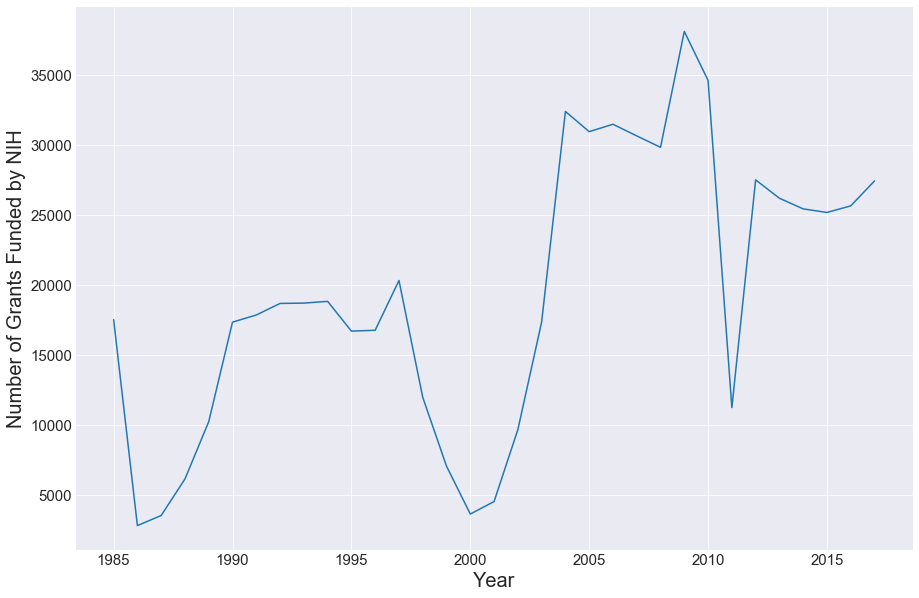

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(R01s_per_year.loc[R01s_per_year.index != 2018.0]["grant_num"])
plt.xlabel("Year", size = 20)
plt.ylabel("Number of Grants Funded by NIH", size = 20)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

In [14]:
R01_2009 = funded_R01_projects_category[funded_R01_projects_category.FY == 2009]

In [23]:
R01_2009_categories = R01_2009.category.unique()

In [24]:
len(R01_2009_categories)

171

In [15]:
R01_2009_categories = R01_2009.groupby("category").count()

In [18]:
R01_2009_categories[R01_2009_categories.grant_num == 0]

,APPLICATION_ID,ARRA_FUNDED,AWARD_NOTICE_DATE,BUDGET_END,BUDGET_START,CFDA_CODE,CORE_PROJECT_NUM,DIRECT_COST_AMT,ED_INST_TYPE,FOA_NUMBER,...,PROJECT_TERMS,PROJECT_TITLE,STUDY_SECTION,SUBPROJECT_ID,SUFFIX,TOTAL_COST,TOTAL_COST_SUB_PROJECT,ABSTRACT_TEXT,grant_num,probability
category,,,,,,,,,,,,,,,,,,,,,


In [25]:
R01_2000 = funded_R01_projects_category[funded_R01_projects_category.FY == 2000]

In [26]:
R01_2000_categories = R01_2000.category.unique()

In [27]:
len(R01_2000_categories)

162

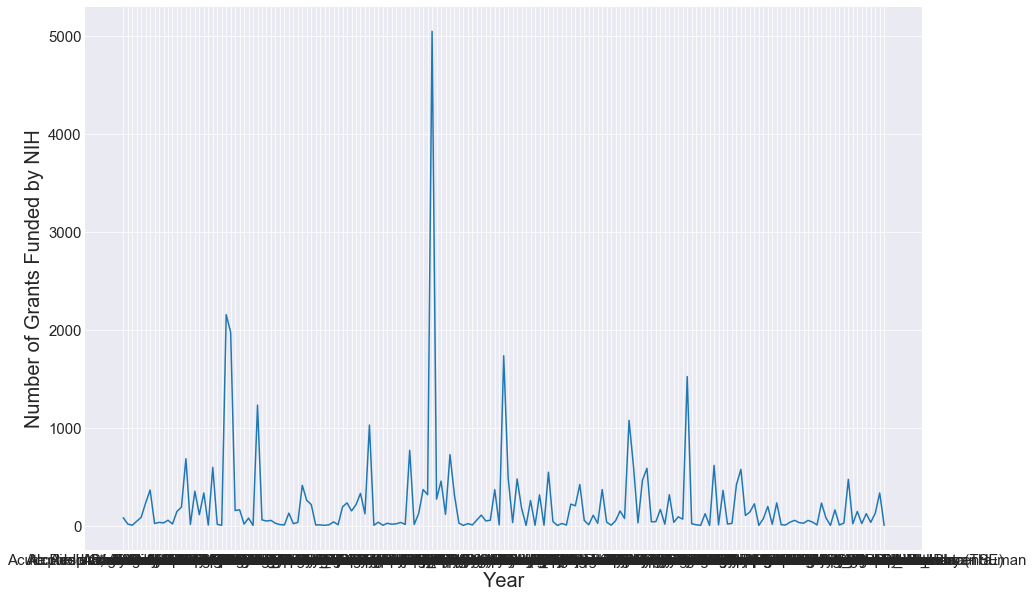

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(R01_2009_categories["grant_num"])
plt.xlabel("Year", size = 20)
plt.ylabel("Number of Grants Funded by NIH", size = 20)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

In [48]:
years = []
categories = []
for year in np.sort(funded_R01_projects_category.FY.unique()):
    df_year = funded_R01_projects_category[funded_R01_projects_category.FY == year]
    num_categories = len(df_year.category.unique())
    categories.append(num_categories)
    years.append(year)

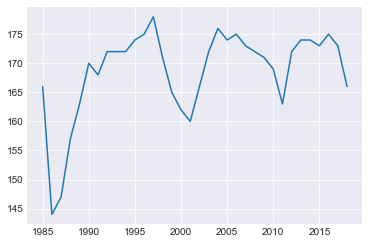

In [50]:
plt.plot(years, categories)

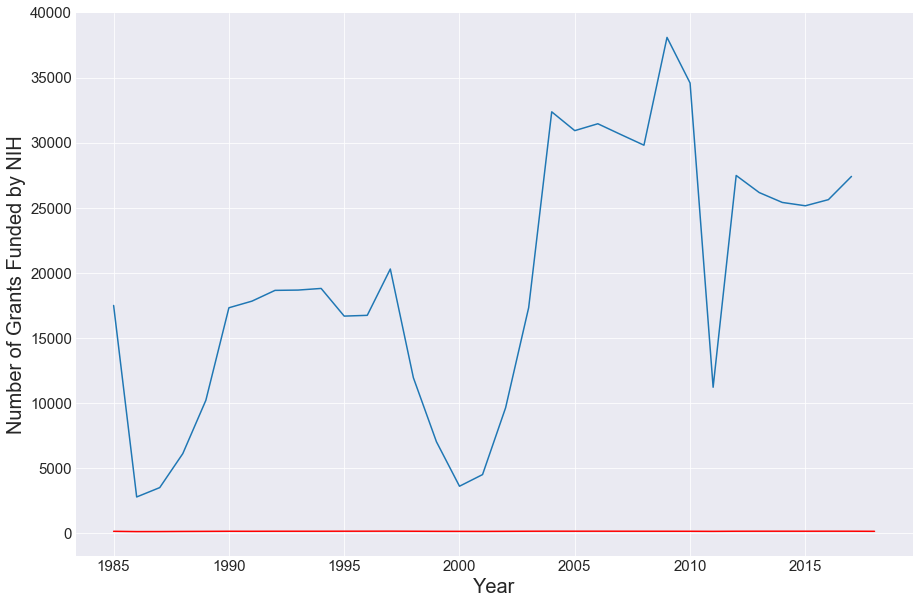

In [51]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(R01s_per_year.loc[R01s_per_year.index != 2018.0]["grant_num"])
plt.plot(years, categories, color = "red")
plt.xlabel("Year", size = 20)
plt.ylabel("Number of Grants Funded by NIH", size = 20)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

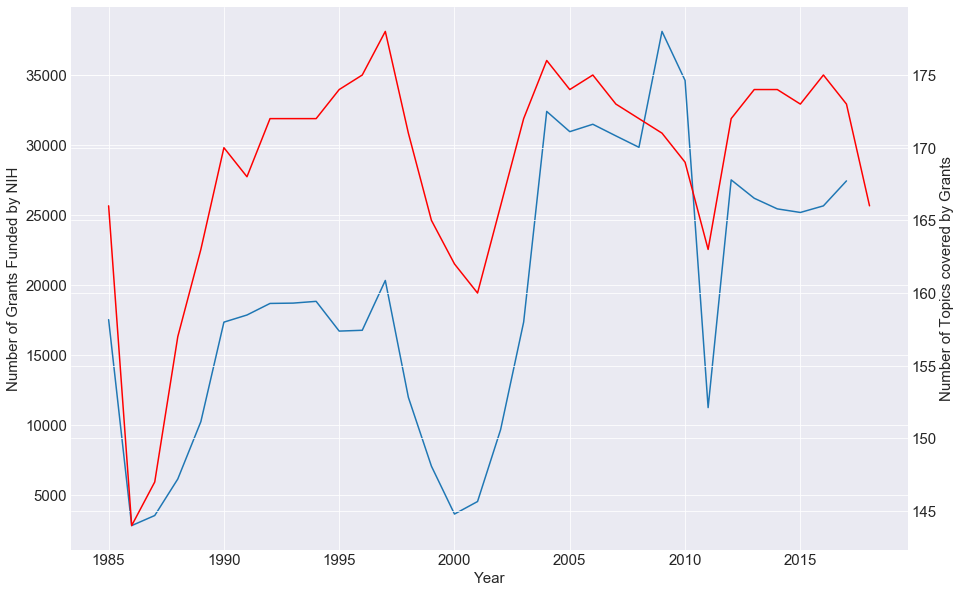

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(R01s_per_year.loc[R01s_per_year.index != 2018.0]["grant_num"])
ax2.plot(years, categories, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Grants Funded by NIH', fontsize = 15)
ax2.set_ylabel('Number of Topics covered by Grants', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);